In [2]:
NAME: Sachin Kumar Shukla
Roll Number: 1024060060
Batch: 2F12

SyntaxError: invalid decimal literal (ipython-input-916773273.py, line 3)

# Assignment Questions

## Missing Data Handling:
Load a dataset with some missing values. Try three different methods for handling missing data:

Dropping rows/columns
Replacing with mean/median
Using KNNImputer or IterativeImputer
Compare the results.

## Scaling Techniques:
Apply Min-Max Scaling and Standard Scaling on the same dataset. Plot the distributions before and after scaling. Which scaling technique is more appropriate for features with outliers?

## Label Encoding vs One-Hot Encoding:
Take a categorical feature (e.g., "city" with values Delhi, Mumbai, Chennai). Encode it using both LabelEncoder and OneHotEncoder. Discuss when each should be used.

## Custom Function for Normalization:
Write a function to manually normalize a feature (0–1 range). Compare its output with MinMaxScaler from sklearn.

## Imputation with Domain Knowledge:
Suppose a "Salary" column has missing values. Instead of mean/median, fill them based on the "Education Level" column (hint: groupby + fillna). Show the steps.

## Detecting Outliers:
Implement Z-score method to detect outliers in a numeric feature. Compare it with the IQR method for the same feature.

## Feature Engineering:
Create a new feature by combining two existing features in the dataset (e.g., BMI = weight / height²). Normalize and scale the new feature.

# Suitable Datasets for Each Question

## Missing Data Handling

Dataset: Titanic dataset (seaborn.load_dataset("titanic")) → has many missing values (age, deck, embarked).

## Scaling Techniques

Dataset: Boston Housing (sklearn.datasets.fetch_california_housing) → has numerical features with different scales.

## Label Encoding vs One-Hot Encoding

Dataset: Titanic dataset (use "sex" or "embarked" column).

## Custom Function for Normalization

Dataset: Iris dataset (sklearn.datasets.load_iris) → numerical features like petal/sepal length.

## Imputation with Domain Knowledge

Dataset: Titanic dataset → impute "age" based on "class" or "sex".

## Detecting Outliers

Dataset: Boston Housing (or California Housing) → "house value" column has natural outliers.

## Feature Engineering

Dataset: Titanic → create "FamilySize" = SibSp + Parch + 1.

Or Iris → create "PetalRatio" = PetalLength / PetalWidth.

In [ ]:
#Missing data handeling
import seaborn as sns

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Save to CSV
titanic.to_csv("titanic.csv", index=False)

print("Titanic dataset saved as titanic.csv")


Titanic dataset saved as titanic.csv


In [ ]:
# Missing Data Handling Example
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 1. Load dataset
data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv") #GITHUB LINK
print("Original data shape:", data.shape)

# 2. Add some missing values randomly (just for practice)
np.random.seed(0)
data_missing = data.copy()
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for col in cols:
    data_missing.loc[data_missing.sample(frac=0.1).index, col] = np.nan

print("\nMissing values in dataset:")
print(data_missing.isnull().sum())

# Method 1: Drop missing row
drop_rows = data_missing.dropna()
print("\nShape after dropping rows:", drop_rows.shape)


# Method 2: Fill with mean/median

fill_mean = data_missing.fillna(data_missing.mean(numeric_only=True))
fill_median = data_missing.fillna(data_missing.median(numeric_only=True))

print("\nMissing values after mean imputation:", fill_mean.isnull().sum().sum())
print("Missing values after median imputation:", fill_median.isnull().sum().sum())
# Method 3: KNN and Iterative Imputer
knn = KNNImputer(n_neighbors=3)
knn_data = data_missing.copy()
knn_data[cols] = knn.fit_transform(knn_data[cols])
# Iterative
iter_imp = IterativeImputer(random_state=42, max_iter=10)
iter_data = data_missing.copy()
iter_data[cols] = iter_imp.fit_transform(iter_data[cols])
print("\nMissing values after KNN Imputer:", knn_data.isnull().sum().sum())
print("Missing values after Iterative Imputer:", iter_data.isnull().sum().sum())

# Quick Comparison
print("\n--- Comparison of Methods ---")
print("Original data with missing values:", data_missing.isnull().sum().sum())
print("After Dropping rows:", drop_rows.isnull().sum().sum())
print("After Mean imputation:", fill_mean.isnull().sum().sum())
print("After Median imputation:", fill_median.isnull().sum().sum())
print("After KNN imputer:", knn_data.isnull().sum().sum())
print("After Iterative imputer:", iter_data.isnull().sum().sum())

Original data shape: (150, 5)

Missing values in dataset:
sepal_length    15
sepal_width     15
petal_length    15
petal_width     15
species          0
dtype: int64

Shape after dropping rows: (98, 5)

Missing values after mean imputation: 0
Missing values after median imputation: 0

Missing values after KNN Imputer: 0
Missing values after Iterative Imputer: 0

--- Comparison of Methods ---
Original data with missing values: 60
After Dropping rows: 0
After Mean imputation: 0
After Median imputation: 0
After KNN imputer: 0
After Iterative imputer: 0


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
#Scaling techniques
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
housing = fetch_california_housing(as_frame=True)

# Convert to DataFrame
df = housing.frame  # already a pandas DataFrame
print(df.head())

# Show shape and column names
print("\nShape of dataset:", df.shape)
print("Columns:", df.columns.tolist())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Shape of dataset: (20640, 9)
Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


Numeric Columns: ['survived', 'pclass', 'sibsp', 'parch', 'fare']


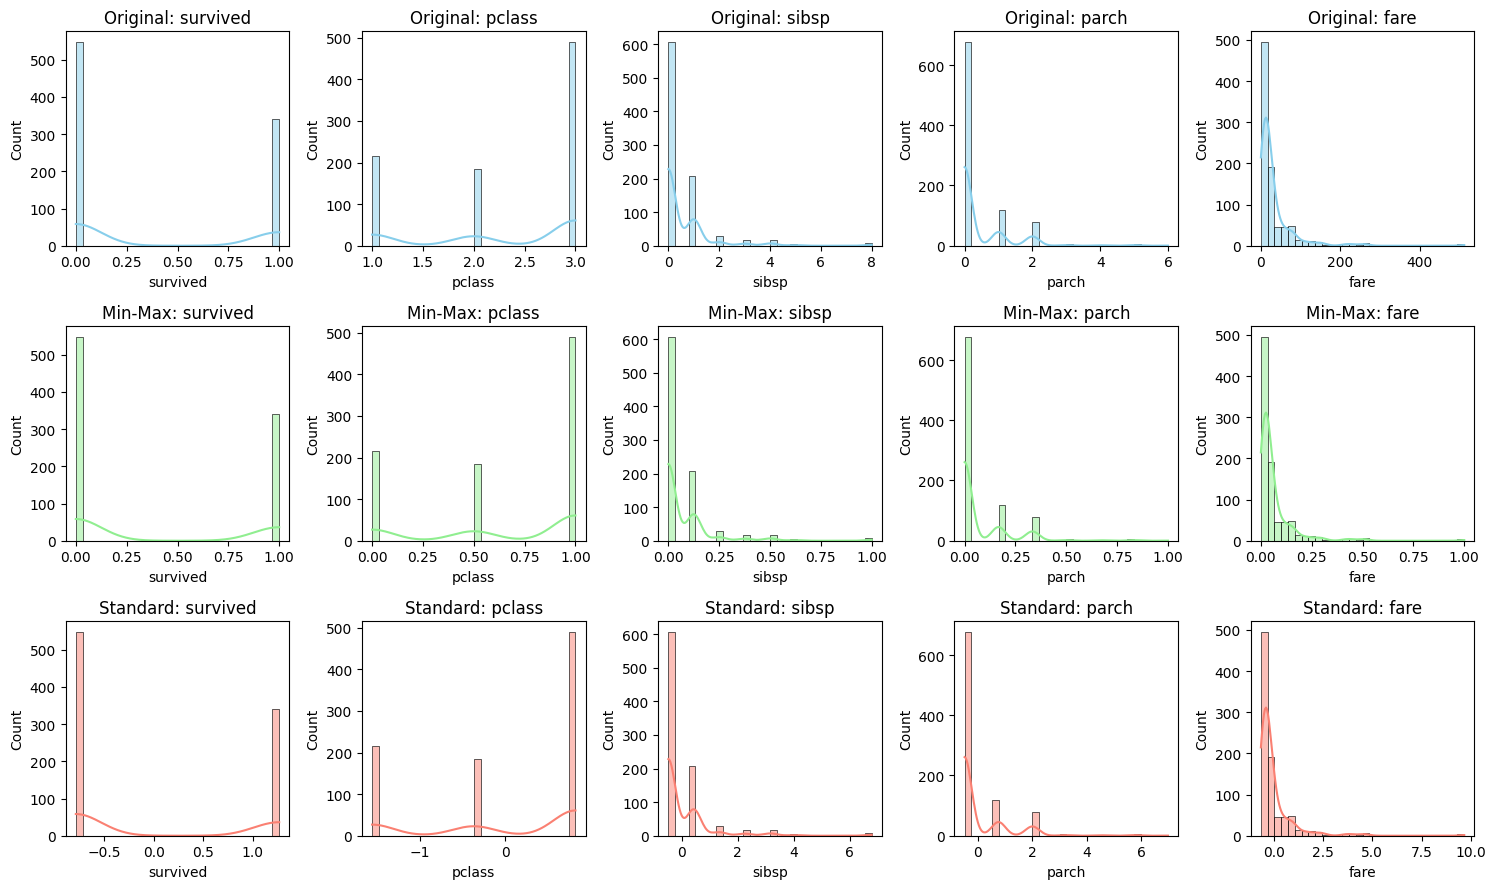

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Select numeric features (ignore categorical ones like sex, class, etc.)
num_cols = df.select_dtypes(include="number").dropna(axis=1).columns
data = df[num_cols].dropna()

print("Numeric Columns:", list(num_cols))

# Apply Min-Max Scaling

mm_scaler = MinMaxScaler()
data_mm = pd.DataFrame(mm_scaler.fit_transform(data), columns=num_cols)

# Apply Standard Scaling

std_scaler = StandardScaler()
data_std = pd.DataFrame(std_scaler.fit_transform(data), columns=num_cols)

# Plot

fig, axes = plt.subplots(3, len(num_cols), figsize=(15, 9))

for i, col in enumerate(num_cols):
    # Original
    sns.histplot(data[col], bins=30, ax=axes[0, i], kde=True, color="skyblue")
    axes[0, i].set_title(f"Original: {col}")

    # Min-Max
    sns.histplot(data_mm[col], bins=30, ax=axes[1, i], kde=True, color="lightgreen")
    axes[1, i].set_title(f"Min-Max: {col}")

    # Standard
    sns.histplot(data_std[col], bins=30, ax=axes[2, i], kde=True, color="salmon")
    axes[2, i].set_title(f"Standard: {col}")

plt.tight_layout()
plt.show()


In [ ]:
#label encoding vs one hot encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Sample dataset
data = pd.DataFrame({
    "city": ["Delhi", "Mumbai", "Chennai", "Delhi", "Mumbai", "Chennai"]
})
print("Original Data:\n", data)
# Label Encoding

le = LabelEncoder()
data["city_label"] = le.fit_transform(data["city"])
print("\nLabel Encoded:\n", data)

# One-Hot Encoding

ohe = OneHotEncoder(sparse_output=False)  # use sparse=False for older sklearn
city_ohe = ohe.fit_transform(data[["city"]])

# Convert to DataFrame for clarity
city_ohe_df = pd.DataFrame(city_ohe, columns=ohe.get_feature_names_out(["city"]))
print("\nOne-Hot Encoded:\n", city_ohe_df)

# Combine with original
final_data = pd.concat([data, city_ohe_df], axis=1)
print("\nFinal Data with Both Encodings:\n", final_data)


Original Data:
       city
0    Delhi
1   Mumbai
2  Chennai
3    Delhi
4   Mumbai
5  Chennai

Label Encoded:
       city  city_label
0    Delhi           1
1   Mumbai           2
2  Chennai           0
3    Delhi           1
4   Mumbai           2
5  Chennai           0

One-Hot Encoded:
    city_Chennai  city_Delhi  city_Mumbai
0           0.0         1.0          0.0
1           0.0         0.0          1.0
2           1.0         0.0          0.0
3           0.0         1.0          0.0
4           0.0         0.0          1.0
5           1.0         0.0          0.0

Final Data with Both Encodings:
       city  city_label  city_Chennai  city_Delhi  city_Mumbai
0    Delhi           1           0.0         1.0          0.0
1   Mumbai           2           0.0         0.0          1.0
2  Chennai           0           1.0         0.0          0.0
3    Delhi           1           0.0         1.0          0.0
4   Mumbai           2           0.0         0.0          1.0
5  Chennai       

In [ ]:
#custom function for normalisation
#dataset loading
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target  # add target labels (0,1,2)

print("First 5 rows:\n", df.head())
print("\nShape of dataset:", df.shape)
print("Target names:", iris.target_names)



First 5 rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Shape of dataset: (150, 5)
Target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Custom normalization function
def custom_minmax(series):
    return (series - series.min()) / (series.max() - series.min())

# Example dataset
data = pd.DataFrame({
    "marks": [23, 45, 67, 89, 12, 56, 78]
})

print("Original Data:\n", data)
# Apply custom normalization

data["custom_norm"] = custom_minmax(data["marks"])

# Apply sklearn MinMaxScaler
scaler = MinMaxScaler()
data["sklearn_norm"] = scaler.fit_transform(data[["marks"]])

print("\nAfter Normalization:\n", data)


Original Data:
    marks
0     23
1     45
2     67
3     89
4     12
5     56
6     78

After Normalization:
    marks  custom_norm  sklearn_norm
0     23     0.142857      0.142857
1     45     0.428571      0.428571
2     67     0.714286      0.714286
3     89     1.000000      1.000000
4     12     0.000000      0.000000
5     56     0.571429      0.571429
6     78     0.857143      0.857143


In [1]:
#Imputation with Domain Knowledge
import seaborn as sns
import pandas as pd

# Step 1: Load Titanic data

titanic = sns.load_dataset("titanic")
print("Shape:", titanic.shape)
print(titanic.head())

# Check missing values
print("\nMissing values:\n", titanic.isnull().sum())

# Calculate median age grouped by sex and class
age_medians = titanic.groupby(["sex", "class"])["age"].median()
print("\nMedian ages by sex & class:\n", age_medians)

# Function to fill missing ages
def impute_age(row):
    if pd.isnull(row["age"]):
        return age_medians[row["sex"], row["class"]]
    else:
        return row["age"]

# Apply function
titanic["age_imputed"] = titanic.apply(impute_age, axis=1)

# Step 3: Check results
print("\nMissing values after imputation:\n", titanic["age_imputed"].isnull().sum())
print("\nSample before & after:\n", titanic[["sex", "class", "age", "age_imputed"]].head(10))



Shape: (891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who          

/tmp/ipython-input-719000147.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_medians = titanic.groupby(["sex", "class"])["age"].median()


Shape: (20640, 9)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Description of MedHouseVal:
 count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


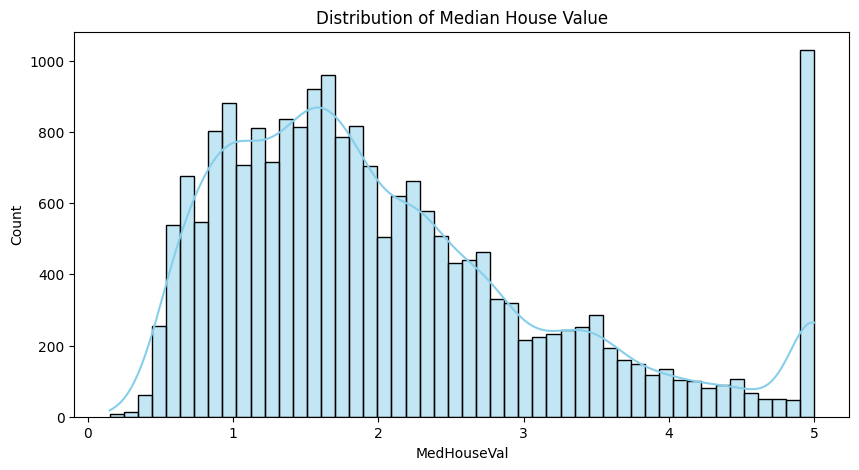


IQR Method → Outliers count: 1071
Z-Score Method → Outliers count: 0


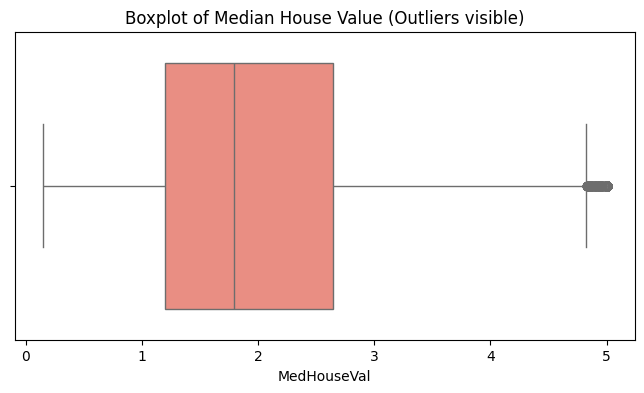

In [ ]:
# Detecting outliers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Step 1: Load dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame  # already a DataFrame

print("Shape:", df.shape)
print(df.head())

# Target column = MedHouseVal
print("\nDescription of MedHouseVal:\n", df["MedHouseVal"].describe())

# Step 2: Visualize distribution

plt.figure(figsize=(10,5))
sns.histplot(df["MedHouseVal"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Median House Value")
plt.show()

# Step 3: Detect outliers

# Method 1: IQR method
Q1 = df["MedHouseVal"].quantile(0.25)
Q3 = df["MedHouseVal"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df["MedHouseVal"] < lower_bound) | (df["MedHouseVal"] > upper_bound)]
print("\nIQR Method → Outliers count:", outliers_iqr.shape[0])

# Method 2: Z-score method
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df["MedHouseVal"]))
outliers_z = df[z_scores > 3]
print("Z-Score Method → Outliers count:", outliers_z.shape[0])

# Step 4: Boxplot visualization
plt.figure(figsize=(8,4))
sns.boxplot(x=df["MedHouseVal"], color="salmon")
plt.title("Boxplot of Median House Value (Outliers visible)")
plt.show()


Original shape: (891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

FamilySize column created:
   sibsp  parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0          

/tmp/ipython-input-2404541215.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="FamilySize", data=titanic, palette="viridis")


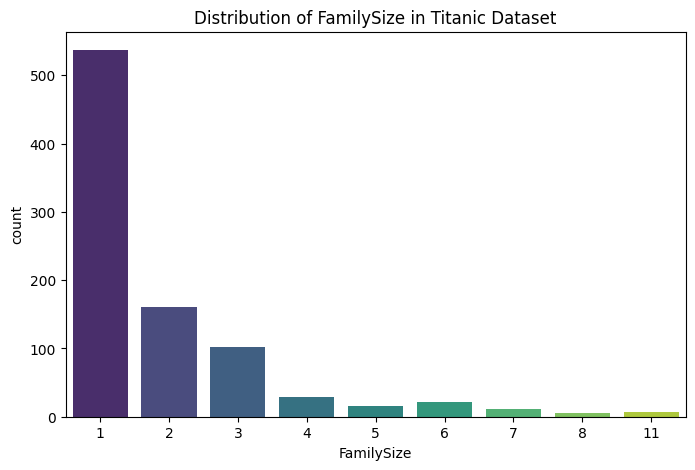

In [ ]:
# Feature engineering
import seaborn as sns
import pandas as pd

# Step 1: Load Titanic dataset
titanic = sns.load_dataset("titanic")

print("Original shape:", titanic.shape)
print(titanic.head())

# Step 2: Create FamilySize

titanic["FamilySize"] = titanic["sibsp"] + titanic["parch"] + 1

# Step 3: Explore FamilySize
print("\nFamilySize column created:")
print(titanic[["sibsp", "parch", "FamilySize"]].head())

# Step 4: Optional - Feature insight

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x="FamilySize", data=titanic, palette="viridis")
plt.title("Distribution of FamilySize in Titanic Dataset")
plt.show()
